In [0]:
import networkx as nx
import random
from collections import defaultdict
import matplotlib.pyplot as plt
from networkx import Graph

def graph_gen(d, number, Seed=None):
    G = nx.Graph()
    adj_list=defaultdict(list)
    def create_edge(u,v):
        if v not in adj_list[u]:
            adj_list[u].append(v)
        if u not in adj_list[v]:
            adj_list[v].append(u)       
    for i in range(0,number-1):
        create_edge(i,i+1)
        G.add_edge(i,i+1,weight=random.randint(1,4000))
    create_edge(number-1,0)
    G.add_edge(number-1,0,weight=random.randint(1,4000))
    for u in range(0,number):
            while len(adj_list[u])<d:
                v= random.randint(u,number)
                if v!=u: 
                  create_edge(u,v)
                  G.add_edge(u,v,weight=random.randint(1,4000))
    return G

def weight_calc(G, weight):
    if callable(weight):
        return weight
    return lambda u, v, data: data.get(weight, 1)

def replace_key(H, bandwidth, index):
    dad = int((index - 1)/2)
    if bandwidth[H[dad]] < bandwidth[H[index]]:
        swap(H,index,dad)
    if dad <= 0:
        return
    else:
        replace_key(H, bandwidth ,dad)
    return

def insert(H, bandwidth, value):
    H.append(value)
    sift_up(H ,bandwidth, len(H) - 1)  
    return

def delete(H, bandwidth):
    n = len(H) - 1
    swap(H, 0, n)
    max = H.pop(n)
    sift_down(H, bandwidth, 0)
    return max
   
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]
    return

def sift_down(H, bandwidth, node):
    child = 2*node + 1
    if child > len(H) - 1:
        return
    if (child + 1 <= len(H) - 1) and (bandwidth[H[child+1]] > bandwidth[H[child]]):
        child += 1
    if bandwidth[H[node]] < bandwidth[H[child]]:
        swap(H, node, child)
        sift_down(H, bandwidth, child)
    else:
        return
  
def sift_up(H, bandwidth, node):
    dad = int((node - 1)/2)
    if bandwidth[H[dad]] < bandwidth[H[node]]:
        swap(H, node, dad)
    if dad <= 0:
        return
    else:
        sift_up(H, bandwidth, dad)
        
def heapSort(list_edges): 
    n = len(list_edges) 
    for i in range(n, -1, -1): 
        heapify1(list_edges, n, i) 
    for i in range(n-1, 0, -1): 
        list_edges[i], list_edges[0] = list_edges[0], list_edges[i] 
        heapify1(list_edges, i, 0)
        
def heapify1(list_edges, n, i): 
    smallest = i  
    l = 2 * i + 1     
    r = 2 * i + 2      
    if l < n and list_edges[i][2] > list_edges[l][2]: 
        smallest = l 
    if r < n and list_edges[smallest][2] > list_edges[r][2]: 
        smallest = r 
    if smallest != i: 
        list_edges[i],list_edges[smallest] = list_edges[smallest],list_edges[i] 
        heapify1(list_edges, n, smallest)

def dijkstra_heap(G, sources, weight,target=None):
    weight = weight_calc(G, weight) 
    status = ['unseen']*len(G)
    parent = [0]*len(G)
    bw = [0]*len(G)
	
    for s in sources:
      status[s] = 'intree'
      bw[s]=1000000
    H=[]
	
    for u,e_wt in G[s].items():
        cost = weight(s, u, e_wt)
        status[u] = 'fringe'
        parent[u] = s
        bw[u] = cost
        insert(H, bw, u)

    while H!=[]:
      v = delete(H,bw)
      status[v]='intree'

      for w,e_wt in G[v].items():
        cost = weight(v, w, e_wt)
        if status[w] == 'unseen':
          status[w] = 'fringe'
          parent[w] = v
          bw[w] = min(bw[v], cost)
          insert(H, bw, w)

        elif status[w]=='fringe' and bw[w] < min(bw[v], cost):
          new_bandwidth = min(bw[v], cost)
          bw[w] = new_bandwidth
          parent[w] = v
          index = H.index(w)
          replace_key(H, bw, index)

    max_bandwidth = bw[target]
    max_bandwidth_path = []

    while parent[target] != s:
      max_bandwidth_path.append(target)
      target=parent[target]

    max_bandwidth_path.append(target)
    max_bandwidth_path.append(parent[target])
    return parent, bw, status, max_bandwidth, max_bandwidth_path


"""Dijkstra without heap implementation"""
import numpy as np
def dijkstra_without_heap(G, sources, weight,target=None):
    weight = weight_calc(G, weight) 
    status = ['unseen']*len(G)
    parent = [0]*len(G)
    bw = [0]*len(G)
	
    for s in sources:
      status[s] = 'intree'
      bw[s]=1000000
	  
    for u,e_wt in G[s].items():
      if u!=s:
        cost = weight(s, u, e_wt)
        status[u] = 'fringe'
        parent[u] = s
        bw[u] = cost
		
    while status.count('fringe')!=0:
      bw_new = [0]*len(G)
      for i in range(len(status)):
        if status[i] == 'fringe':
          bw_new[i] = bw[i]
      v = np.argmax(bw_new)
      status[v] = 'intree'
      for w,e_wt in G[v].items():
        cost = weight(v, w, e_wt)
        if status[w] == 'unseen':
          status[w] = 'fringe'
          parent[w] = v
          bw[w] = min(bw[v],cost)
        elif status[w] == 'fringe' and bw[w]<min(bw[v],cost):
          bw[w] = min(bw[v],cost)
          parent[w] = v
		  
    max_bandwidth = bw[target]
    max_bandwidth_path = []
	
    while parent[target] != s:
      max_bandwidth_path.append(target)
      target=parent[target]
    max_bandwidth_path.append(target)  
    max_bandwidth_path.append(parent[target])
    return parent, bw, status, max_bandwidth, max_bandwidth_path

"""Kruskal Algorithm"""
class UnionFind:
    def __init__(self):
        self.wt = {}
        self.dad = {}

    def __getitem__(self, object):
        if object not in self.dad:
            self.dad[object] = object
            self.wt[object] = 1
            return object
        path = [object]
        root = self.dad[object]
        while root != path[-1]:
            path.append(root)
            root = self.dad[root]
        for parent in path:
            self.dad[parent] = root
        return root
        
    def __iter__(self):
        return iter(self.dad)
      
    def union(self, *objects):
        roots = [self[x] for x in objects]
        heaviest = max([(self.wt[r],r) for r in roots])[1]
        for r in roots:
            if r != heaviest:
                self.wt[heaviest] += self.wt[r]
                self.dad[r] = heaviest

def kruskal_mst_edges(G, weight='weight',data=True):
    trees = UnionFind()
    list_edges=[]
    for u,v,wt in T.edges.data('weight'):
      list_edges.append((u,v,wt)) 
    edges=heapSort(list_edges)
    for  u, v, wt in edges:
        if trees[u] != trees[v]:
            if data:
                yield (u, v, d)
            else:
                yield (u, v)
            trees.union(u, v)

def maximum_spanning_tree(G, weight='weight'):
    edges = kruskal_mst_edges(G,weight=weight, data=data)
    edges = list(edges)
    T = G.__class__() 
    T.graph.update(G.graph)
    T.add_nodes_from(G.nodes.items())
    T.add_edges_from(edges)
    return T

from collections import defaultdict
def dfs_edges(G, source=None, depth=None):
    if source is None:
        nodes = G
    else:
        nodes = [source]
    visited = set()
    if depth is None:
        depth = len(G)
    for start in nodes:
        if start in visited:
            continue
        visited.add(start)
        stack = [(start, depth, iter(G[start]))]
        while stack:
            parent, current_depth, children = stack[-1]
            try:
                child = next(children)
                if child not in visited:
                    yield parent, child
                    visited.add(child)
                    if current_depth > 1:
                        stack.append((child, current_depth - 1, iter(G[child])))
            except StopIteration:
                stack.pop()

def dfs_predecessors(G, source=None, depth=None):
    return {t: s for s, t in dfs_edges(G, source, depth)}

s=600
t=2410

from time import time
t1 = time()
G=graph_gen(6,5000,3)
t2 = time()
print("Graph Generation: ",(t2-t1))

t5=time()
parent, bw, status, max_bandwidth, max_bandwidth_path = dijkstra_without_heap(G, {s}, 'weight',target=t) #
print('Path without Heap: \n ',max_bandwidth_path)
print('Maximum Bandwidth Dijkstra: Without Heap',max_bandwidth)
t6=time()
print("Time for Dijkstra Without Heap: ",(t6-t5))

t3 = time()
parent, bw, status, max_bandwidth, max_bandwidth_path = dijkstra_heap(G, {s}, 'weight',target=t) #
print('Path with Heap: \n ',max_bandwidth_path)
print('Maximum Bandwidth Dijkstra: Heap',max_bandwidth)
t4=time()
print("Time for Dijkstra With Heap: ",(t4-t3))

t7=time()
T=nx.maximum_spanning_tree(G)
t8=time()
parent = dfs_predecessors(T,s)
bandwidth_array=[]
for u,v,weight in T.edges.data('weight'): 
  bandwidth_array.append((u,v,weight))
path=[t]

while parent[t]!=s:
  path.append(parent[t])
  t=parent[t]
path.append(s)
print('Kruskal Path: \n', path)

path.reverse()
max_bandwidth_kruskal=1000000
for i in range(len(path)-1): 
  temp_bandwidth = [item[2] for item in bandwidth_array if (item[0] == path[i] and item[1]==path[i+1]) or (item[1] == path[i] and item[0]==path[i+1])][0]
  if temp_bandwidth < max_bandwidth_kruskal:
    max_bandwidth_kruskal = temp_bandwidth  
print('Maximum Bandwidth Kruskal: ',max_bandwidth_kruskal)
t9=time()

print("Timing Analysis")
print("Graph Generation: ",(t2-t1))
print("Time for Dijkstra Without Heap: ",(t6-t5))
print("Time for Dijkstra With Heap: ",(t4-t3))
print("Time for generation of Tree: ",(t8-t7))
print("Time for finding the Path: ",(t9-t8))
print("Total Time Kruskal:",(t9-t7))

Graph Generation:  0.09596800804138184
Path without Heap: 
  [2410, 2409, 3011, 3010, 2394, 3690, 3689, 1893, 1892, 3789, 3649, 208, 209, 1049, 3039, 3038, 1242, 1243, 1244, 4049, 2424, 2423, 2309, 2310, 1174, 600]
Maximum Bandwidth Dijkstra: Without Heap 2465
Time for Dijkstra Without Heap:  4.187859296798706
Path with Heap: 
  [2410, 2409, 3011, 3010, 2394, 3690, 3689, 1893, 1892, 3789, 2733, 1652, 4727, 4047, 4048, 4049, 2424, 2423, 2309, 2310, 1174, 600]
Maximum Bandwidth Dijkstra: Heap 2465
Time for Dijkstra With Heap:  0.29909276962280273
Kruskal Path: 
 [2410, 2409, 3011, 3010, 2394, 3690, 3689, 1893, 1892, 3789, 2733, 1652, 4727, 4047, 4048, 4049, 2424, 2423, 2309, 2310, 1174, 600]
Maximum Bandwidth Kruskal:  2465
Timing Analysis
Graph Generation:  0.09596800804138184
Time for Dijkstra Without Heap:  4.187859296798706
Time for Dijkstra With Heap:  0.29909276962280273
Time for generation of Tree:  0.20200729370117188
Time for finding the Path:  0.050907135009765625
Total Time Kr

In [0]:
import random
from collections import defaultdict
import networkx as nx
from networkx import Graph

def random_graph(degree, number, Seed=None):
    G = nx.Graph()
    adjacency_list=defaultdict(list)
    def create_edge(u,v):
        if v not in adjacency_list[u]:
            adjacency_list[u].append(v)
        if u not in adjacency_list[v]:
            adjacency_list[v].append(u)       
    for i in range(0,number-1):
        create_edge(i,i+1)
        G.add_edge(i,i+1,wt=random.randint(1,5000))
    create_edge(number-1,0)
    G.add_edge(number-1,0,wt=random.randint(1,5000))
    for u in range(0,number):
            while len(adjacency_list[u])<degree:
                v= random.randint(u,number)
                if v!=u: 
                  create_edge(u,v)
                  G.add_edge(u,v,wt=random.randint(1,5000))
    return G

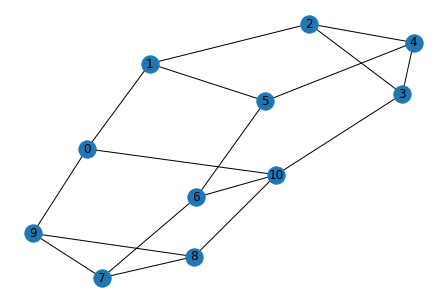

In [0]:
G=random_graph(3,10,2)
# print(G.number_of_edges())
# # print(G.degree([4950]))
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G,with_labels = True,edge_labels=labels)


Dijkstra Algorithm


In [0]:
def weight_calc(G, weight):
    if callable(weight):
        return weight
    return lambda u, v, data: data.get(weight, 1)

In [0]:
def replace_key(H, bw, index):
    parent = int((index - 1)/2)
    if bw[H[parent]] < bw[H[index]]:
        swap(H,index,parent)
    if parent <= 0:
        return
    else:
        replace_key(H, bw ,parent)
    return

def insert(H, bw, value):
    H.append(value)
    sift_up(H ,bw, len(H) - 1)  
    return

def delete(H, bw):
    n = len(H) - 1
    swap(H, 0, n)
    max = H.pop(n)
    sift_down(H, bw, 0)
    return max
   
def swap(A, i, j):
    A[i], A[j] = A[j], A[i]
    return

def sift_down(H, bw, node):
    child = 2*node + 1
    if child > len(H) - 1:
        return
    if (child + 1 <= len(H) - 1) and (bw[H[child+1]] > bw[H[child]]):
        child += 1
    if bw[H[node]] < bw[H[child]]:
        swap(H, node, child)
        sift_down(H, bw, child)
    else:
        return
  
def sift_up(H, bw, node):
    parent = int((node - 1)/2)
    if bw[H[parent]] < bw[H[node]]:
        swap(H, node, parent)
    if parent <= 0:
        return
    else:
        sift_up(H, bw, parent)
        
def heapSort(list_edges): 
    n = len(list_edges) 
    for i in range(n, -1, -1): 
        heapify1(list_edges, n, i) 
    for i in range(n-1, 0, -1): 
        list_edges[i], list_edges[0] = list_edges[0], list_edges[i] 
        heapify1(list_edges, i, 0)
        
def heapify1(list_edges, n, i): 
    smallest = i  
    l = 2 * i + 1     
    r = 2 * i + 2      
    if l < n and list_edges[i][2] > list_edges[l][2]: 
        smallest = l 
    if r < n and list_edges[smallest][2] > list_edges[r][2]: 
        smallest = r 
    if smallest != i: 
        list_edges[i],list_edges[smallest] = list_edges[smallest],list_edges[i] 
        heapify1(list_edges, n, smallest)

In [0]:
def dijkstra_heap(G, sources, weight,target=None):
    weight = weight_calc(G, weight) 
    status = ['unseen']*len(G)
    parent = [0]*len(G)
    bw = [0]*len(G)
    for s in sources:
      status[s] = 'intree'
      bw[s]=1000000
    H=[] 
    for u,edge_weight in G[s].items():
        cost = weight(s, u, edge_weight)
        status[u] = 'fringe'
        parent[u] = s
        bw[u] = cost
        insert(H, bw, u)
		
    while H!=[]:
      v = delete(H,bw)
      status[v]='intree'

      for w,edge_weight in G[v].items():
        cost = weight(v, w, edge_weight)
        if status[w] == 'unseen':
          status[w] = 'fringe'
          parent[w] = v
          bw[w] = min(bw[v], cost)
          insert(H, bw, w)

        elif status[w]=='fringe' and bw[w] < min(bw[v], cost):
          new_bw = min(bw[v], cost)
          bw[w] = new_bw
          parent[w] = v
          index = H.index(w)
          replace_key(H, bw, index)

    max_bw = bw[target]
    max_bw_path = []
	
    while parent[target] != s:
      max_bw_path.append(target)
      target=parent[target]
	  
    max_bw_path.append(target)
    max_bw_path.append(parent[target])
    return max_bw, max_bw_path

Dijkstra without heap implementation

In [0]:
import numpy as np
def dijkstra_without_heap(G, sources, weight,target=None):
    weight = weight_calc(G, weight) 
    status = ['unseen']*len(G)
    parent = [0]*len(G)
    bw = [0]*len(G)
    for s in sources:
      status[s] = 'intree'
      bw[s]=1000000
    for u,edge_weight in G[s].items():
      if u!=s:
        cost = weight(s, u, edge_weight)
        status[u] = 'fringe'
        parent[u] = s
        bw[u] = cost
    while status.count('fringe')!=0:
      bw_new = [0]*len(G)
      for i in range(len(status)):
        if status[i] == 'fringe':
          bw_new[i] = bw[i]
      v = np.argmax(bw_new)
      status[v] = 'intree'
      for w,edge_weight in G[v].items():
        cost = weight(v, w, edge_weight)
        if status[w] == 'unseen':
          status[w] = 'fringe'
          parent[w] = v
          bw[w] = min(bw[v],cost)
        elif status[w] == 'fringe' and bw[w]<min(bw[v],cost):
          bw[w] = min(bw[v],cost)
          parent[w] = v
    max_bw = bw[target]
    max_bw_path = []
    while parent[target] != s:
      max_bw_path.append(target)
      target=parent[target]
    max_bw_path.append(target)  
    max_bw_path.append(parent[target])
    return max_bw, max_bw_path	

Kruskal Algorithm

In [0]:
class UnionFind:
    def __init__(self):
        self.wt = {}
        self.dad = {}

    def __getitem__(self, object):
        if object not in self.dad:
            self.dad[object] = object
            self.wt[object] = 1
            return object
        path = [object]
        root = self.dad[object]
        while root != path[-1]:
            path.append(root)
            root = self.dad[root]
        for ancestor in path:
            self.dad[ancestor] = root
        return root
        
    def __iter__(self):
        return iter(self.dad)
      
    def union(self, *objects):
        roots = [self[x] for x in objects]
        heaviest = max([(self.wt[r],r) for r in roots])[1]
        for r in roots:
            if r != heaviest:
                self.wt[heaviest] += self.wt[r]
                self.dad[r] = heaviest

In [0]:
def kruskal_mst_edges(G, weight='weight',data=True):
    subtrees = UnionFind()
    edgelist=[]
    for u,v,weight in T.edges.data('weight'):
      edgelist.append((u,v,weight)) 
    edges=heapSort(edgelist)
    for  u, v, weight in edges:
        if subtrees[u] != subtrees[v]:
            if data:
                yield (u, v, d)
            else:
                yield (u, v)
            subtrees.union(u, v)

In [0]:
def maximum_spanning_tree(G, weight='weight'):
    edges = kruskal_mst_edges(G,weight=weight, data=data)
    edges = list(edges)
    T = G.__class__() 
    T.graph.update(G.graph)
    T.add_nodes_from(G.nodes.items())
    T.add_edges_from(edges)
    return T

In [0]:
from collections import defaultdict
def dfs(G, source=None, depth=None):
    nodes = [source]
    visited = set()
    if depth is None:
        depth = len(G)
    for start in nodes:
        if start in visited:
            continue
        visited.add(start)
        stack = [(start, depth, iter(G[start]))]
        while stack:
            parent, depth_now, children = stack[-1]
            try:
                child = next(children)
                if child not in visited:
                    yield parent, child
                    visited.add(child)
                    if depth_now > 1:
                        stack.append((child, depth_now - 1, iter(G[child])))
            except StopIteration:
                stack.pop()

def dfs_list(G, source=None, depth=None):
    return {t: s for s, t in dfs(G, source, depth)}

In [0]:
# s=1
# t=987

# s=1002
# t=4867

# s=3502
# t=10

# s=4080
# t=2752

s=600
t=2410

from time import time
t1 = time()
G=random_graph(6,5000,3)
t2 = time()
# print("Graph Generation: ",(t2-t1))

t5=time()
max_bandwidth, max_bandwidth_path = dijkstra_without_heap(G, {s}, 'weight',target=t) #
print('Path without Heap: \n ',max_bandwidth_path)
print('Maximum Bandwidth Dijkstra: Without Heap',max_bandwidth)
t6=time()
# print("Time for Dijkstra Without Heap: ",(t6-t5))

t3 = time()
max_bandwidth, max_bandwidth_path = dijkstra_heap(G, {s}, 'weight',target=t) #
print('Path with Heap: \n ',max_bandwidth_path)
print('Maximum Bandwidth Dijkstra: Heap',max_bandwidth)
t4=time()
# print("Time for Dijkstra With Heap: ",(t4-t3))


t7=time()
T=nx.maximum_spanning_tree(G)
t8=time()
parent = dfs_list(T,s)
bandwidth_array=[]
for u,v,weight in T.edges.data('weight'): 
  bandwidth_array.append((u,v,weight))
path=[t]

while parent[t]!=s:
  path.append(parent[t])
  t=parent[t]
path.append(s)
print('Kruskal Path: \n', path)

path.reverse()
max_bandwidth_kruskal=1000000
for i in range(len(path)-1): 
  temp_bandwidth = [item[2] for item in bandwidth_array if (item[0] == path[i] and item[1]==path[i+1]) or (item[1] == path[i] and item[0]==path[i+1])][0]
  if temp_bandwidth < max_bandwidth_kruskal:
    max_bandwidth_kruskal = temp_bandwidth  
print('Maximum Bandwidth Kruskal: ',max_bandwidth_kruskal)
t9=time()

print("Timing Analysis")
print("Graph Generation: ",(t2-t1))
print("Time for Dijkstra Without Heap: ",(t6-t5))
print("Time for Dijkstra With Heap: ",(t4-t3))
# print("Time for generation of Tree: ",(t8-t7))
# print("Time for finding the Path: ",(t9-t8))
print("Total Time Kruskal:",(t9-t7))

In [0]:
print(bandwidth_array)

[(0, 1, None), (0, 4999, None), (0, 3973, None), (0, 137, None), (0, 2036, None), (0, 169, None), (1, 2, None), (1, 1236, None), (1, 1856, None), (1, 1199, None), (1, 557, None), (2, 3, None), (2, 2205, None), (2, 4081, None), (2, 4945, None), (2, 4842, None), (3, 4, None), (3, 382, None), (3, 4750, None), (3, 4984, None), (3, 1879, None), (4, 5, None), (4, 1530, None), (4, 196, None), (4, 4859, None), (4, 1987, None), (5, 6, None), (5, 3662, None), (5, 261, None), (5, 4804, None), (5, 1339, None), (6, 7, None), (6, 4606, None), (6, 3822, None), (6, 3111, None), (6, 1845, None), (7, 8, None), (7, 2497, None), (7, 4742, None), (7, 2836, None), (7, 690, None), (8, 9, None), (8, 18, None), (8, 3497, None), (8, 3870, None), (8, 2162, None), (9, 10, None), (9, 1434, None), (9, 3009, None), (9, 2447, None), (9, 2624, None), (10, 11, None), (10, 110, None), (10, 75, None), (10, 654, None), (10, 1609, None), (11, 12, None), (11, 692, None), (11, 2807, None), (11, 4415, None), (11, 417, None), 

In [0]:
labels = nx.get_edge_attributes(G,'weight')
print(labels)
nx.draw(G,with_labels = True,edge_labels=labels)
